# Chapter 10: Iris, Fashion MNIST & District Housing

This notebook contains the code for chapter 10 of the Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow book.

In [1]:
import time

from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from scipy.stats import reciprocal

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.models import Model, Sequential, clone_model, load_model
from tensorflow.keras.layers import Concatenate, Dense, Flatten, Input
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import SGD

import tensorflow as tf
import pandas as pd
import numpy as np

## Global configuration

In [2]:
LOGS_PATH = "../logs/"

MODEL_PATH = "../models/"

RANDOM_SEED = 42

JOB_COUNT = 1 # FIX: gpu out of memory error

In [3]:
tf.random.set_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

## Load <ins>iris</ins> data

In [4]:
iris = load_iris()

## Split <ins>iris</ins> data

In [5]:
X, y = iris.data[:, (2, 3)], (iris.target == 0).astype(int)

## Train <ins>perceptron</ins> model

In [6]:
per_model = Perceptron()

In [7]:
%%time
per_model.fit(X, y)

CPU times: user 404 µs, sys: 547 µs, total: 951 µs
Wall time: 804 µs


Perceptron()

## Evaluate <ins>perceptron</ins> model

In [8]:
per_model.predict([[2, 0.5]])

array([0])

## Load <ins>fashion MNIST</ins> data

In [9]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
y_class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

## Split <ins>fashion MNIST</ins> data

In [11]:
X_train, y_train, X_validation, y_validation = X_train[5000:], y_train[5000:], X_train[:5000], y_train[:5000]

## Scale <ins>fashion MNIST</ins> data

In [12]:
X_train, X_validation = X_train / 255.0, X_validation / 255.0

## Create <ins>sequential</ins> model

In [13]:
clear_session()

In [14]:
seq_model = Sequential()

seq_model.add(Flatten(input_shape=[28, 28]))
seq_model.add(Dense(300, activation="relu"))
seq_model.add(Dense(100, activation="relu"))
seq_model.add(Dense(10, activation="softmax"))

In [15]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Inspect <ins>sequential</ins> model

In [16]:
dense = seq_model.get_layer(seq_model.layers[1].name)
dense

In [17]:
weights, biases = dense.get_weights()

In [18]:
weights, weights.shape

(array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
          0.03859074, -0.06889391],
        [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
         -0.02763776, -0.04165364],
        [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
          0.07121518, -0.07331658],
        ...,
        [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
          0.00228987,  0.05581069],
        [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
          0.00034875,  0.02878492],
        [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
          0.00272203, -0.06793761]], dtype=float32),
 (784, 300))

In [19]:
biases, biases.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

## Compile <ins>sequential</ins> model

In [20]:
seq_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## Train <ins>sequential</ins> model

In [21]:
%%time
seq_model_history = seq_model.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0187 - accuracy: 0.6805 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5027 - accuracy: 0.8262 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4483 - accuracy: 0.8426 - val_loss: 0.5338 - val_accuracy: 0.7992
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4208 - accuracy: 0.8530 - val_loss: 0.3911 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4061 - accuracy: 0.8580 - val_loss: 0.3743 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8673 - val_loss: 0.3712 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3654 - accuracy: 0.8710 - val_loss: 0.3614 - val_accuracy:

## Plot <ins>sequential</ins> model (learning cuves)

In [22]:
df_seq_model_history = pd.DataFrame(seq_model_history.history)

<AxesSubplot:>

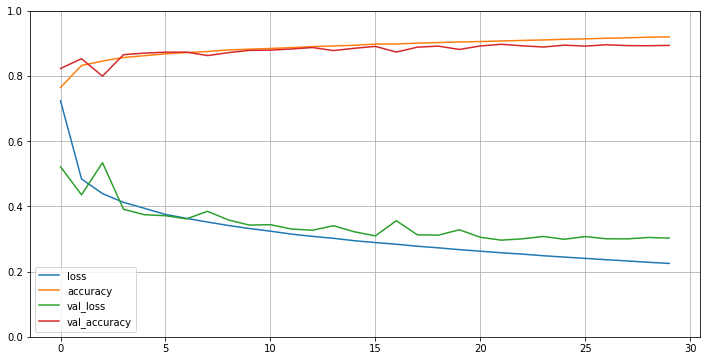

In [23]:
df_seq_model_history.plot(
    ylim=(0, 1),
    grid=True,
    figsize=(12, 6),
)

## Evaluate <ins>sequential</ins> model

In [24]:
X_test_new, y_test_new = X_test[:3], y_test[:3]

In [25]:
y_test_new_probabilities = seq_model.predict(X_test_new)
y_test_new_probabilities.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_test_new_predictions = np.argmax(seq_model.predict(X_test_new), axis=-1)

y_test_new_predictions, y_test_new

(array([9, 2, 1]), array([9, 2, 1], dtype=uint8))

In [27]:
np.array(y_class_names)[y_test_new_predictions], np.array(y_class_names)[y_test_new]

(array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11'),
 array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11'))

In [28]:
seq_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 78.8121 - accuracy: 0.8298


[78.81205749511719, 0.829800009727478]

## Load <ins>housing</ins> data

In [29]:
housing = fetch_california_housing()

## Split <ins>housing</ins> data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=RANDOM_SEED)

In [31]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, random_state=RANDOM_SEED)

## Scale <ins>housing</ins> data

In [32]:
standard_scaler = StandardScaler()

In [33]:
%%time
X_train = standard_scaler.fit_transform(X_train)

CPU times: user 2.28 ms, sys: 258 µs, total: 2.54 ms
Wall time: 1.9 ms


In [34]:
%%time
X_validation = standard_scaler.transform(X_validation)

CPU times: user 472 µs, sys: 0 ns, total: 472 µs
Wall time: 309 µs


In [35]:
%%time
X_test = standard_scaler.transform(X_test)

CPU times: user 783 µs, sys: 0 ns, total: 783 µs
Wall time: 472 µs


## Create <ins>sequential</ins> model

In [36]:
clear_session()

In [37]:
seq_model = Sequential([
    Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    Dense(1),
])

In [38]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## Compile <ins>sequential</ins> model

In [39]:
seq_model.compile(loss="mean_squared_error", optimizer="sgd")

## Train <ins>sequential</ins> model

In [40]:
%%time
seq_model_history = seq_model.fit(X_train, y_train, epochs=20, validation_data=(X_validation, y_validation))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1624 - val_loss: 12.0173
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9593 - val_loss: 2.2028
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4705 - val_loss: 0.3950
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4259 - val_loss: 0.4055
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4124 - val_loss: 0.4103
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3945 - val_loss: 0.4421
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4139 - val_loss: 0.4121
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3944 - val_loss: 0.4069
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3798 - val_loss: 0.4060
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3822 - val_loss: 0.409

## Evaluate <ins>sequential</ins> model

In [41]:
X_test_new, y_test_new = X_test[:3], y_test[:3]

In [42]:
y_test_new_predictions = seq_model.predict(X_test_new)

y_test_new_predictions, y_test_new

(array([[0.59521866],
        [1.7537185 ],
        [4.221365  ]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

In [43]:
seq_model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 738us/step - loss: 0.3500


0.350009560585022

## Transform <ins>housing</ins> data

In [44]:
X_train_a, X_train_b = X_train[:, :5], X_train[:, 2:]
X_validation_a, X_validation_b = X_validation[:, :5], X_validation[:, 2:]
X_test_a, X_test_b = X_test[:, :5], X_test[:, 2:]

## Create <ins>non-sequential</ins> model (single-input)

In [45]:
clear_session()

In [46]:
input_layer = Input(shape=X_train.shape[1:])

hidden_layer_1 = Dense(30, activation="relu")(input_layer)
hidden_layer_2 = Dense(30, activation="relu")(hidden_layer_1)

concat_layer = Concatenate()([input_layer, hidden_layer_2])

output_layer = Dense(1)(concat_layer)

non_seq_si_model = Model(inputs=[input_layer], outputs=[output_layer])

In [47]:
non_seq_si_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

## Create <ins>non-sequential</ins> model (multi-input)

In [48]:
clear_session()

In [49]:
input_layer_a = Input(shape=[5])
input_layer_b = Input(shape=[6])

hidden_layer_1 = Dense(30, activation="relu")(input_layer_b)
hidden_layer_2 = Dense(30, activation="relu")(hidden_layer_1)

concat_layer = Concatenate()([input_layer_a, hidden_layer_2])

output_layer = Dense(1)(concat_layer)

non_seq_mi_model = Model(inputs=[input_layer_a, input_layer_b], outputs=[output_layer])

In [50]:
non_seq_mi_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

## Compile <ins>non-sequential</ins> model (multi-input)

In [51]:
non_seq_mi_model.compile(loss="mse", optimizer="sgd")

## Train <ins>non-sequential</ins> model (multi-input)

In [52]:
%%time
non_seq_mi_model_history = non_seq_mi_model.fit(
    (X_train_a, X_train_b),
    y_train,
    epochs=20,
    validation_data=((X_validation_a, X_validation_b), y_validation),
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1943 - val_loss: 2.9992
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6168 - val_loss: 9.4370
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5845 - val_loss: 0.4052
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4480 - val_loss: 0.4030
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4260 - val_loss: 0.3873
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4152 - val_loss: 0.4463
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4321 - val_loss: 0.3791
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4097 - val_loss: 0.3706
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3933 - val_loss: 0.4185
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3891 - val_loss: 0.3554

## Evaluate <ins>non-sequential</ins> model (multi-input)

In [53]:
X_test_new_a, X_test_new_b, y_test_new = X_test_a[:3], X_test_b[:3], y_test[:3]

In [54]:
y_test_new_predictions = non_seq_mi_model.predict((X_test_new_a, X_test_new_b))

y_test_new_predictions, y_test_new

(array([[0.5409373],
        [1.5530725],
        [3.609915 ]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

In [55]:
non_seq_mi_model.evaluate((X_test_a, X_test_b), y_test)

162/162 [==============================] - 0s 800us/step - loss: 0.3480


0.3480260670185089

## Create <ins>non-sequential</ins> model (multi-output)

In [56]:
clear_session()

In [57]:
input_layer_a = Input(shape=[5])
input_layer_b = Input(shape=[6])

hidden_layer_1 = Dense(30, activation="relu")(input_layer_b)
hidden_layer_2 = Dense(30, activation="relu")(hidden_layer_1)

concat_layer = Concatenate()([input_layer_a, hidden_layer_2])

output_layer_1 = Dense(1)(concat_layer)
output_layer_2 = Dense(1)(hidden_layer_2)

non_seq_mo_model = Model(inputs=[input_layer_a, input_layer_b], outputs=[output_layer_1, output_layer_2])

In [58]:
non_seq_mo_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

## Compile <ins>non-sequential</ins> model (multi-output)

In [59]:
non_seq_mo_model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

## Train <ins>non-sequential</ins> model (multi-output)

In [60]:
%%time
non_seq_mo_model_history = non_seq_mo_model.fit(
    (X_train_a, X_train_b),
    (y_train, y_train),
    epochs=20,
    validation_data=((X_validation_a, X_validation_b), (y_validation, y_validation)),
)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.6362 - dense_2_loss: 1.4809 - dense_3_loss: 3.0330 - val_loss: 1.2866 - val_dense_2_loss: 1.1465 - val_dense_3_loss: 2.5472
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5743 - dense_2_loss: 0.5112 - dense_3_loss: 1.1417 - val_loss: 0.5120 - val_dense_2_loss: 0.4626 - val_dense_3_loss: 0.9564
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4865 - dense_2_loss: 0.4469 - dense_3_loss: 0.8429 - val_loss: 0.4329 - val_dense_2_loss: 0.4008 - val_dense_3_loss: 0.7217
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4639 - dense_2_loss: 0.4356 - dense_3_loss: 0.7187 - val_loss: 0.4384 - val_dense_2_loss: 0.4154 - val_dense_3_loss: 0.6453
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4426 - dense_2_loss: 0.4181 - dense_3_loss: 0.6631 - val_loss: 0.4188 - val_dense_2_loss: 0.3993 - val_dense_3_loss: 0.5947


## Evaluate <ins>non-sequential</ins> model (multi-output)

In [61]:
y_test_new_predictions_1, y_test_new_predictions_2 = non_seq_mo_model.predict((X_test_new_a, X_test_new_b))

y_test_new_predictions_1, y_test_new_predictions_2, y_test_new

(array([[0.50409424],
        [1.5349944 ],
        [3.5876977 ]], dtype=float32),
 array([[0.7805631],
        [1.8662858],
        [3.0616472]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

In [62]:
non_seq_mo_model.evaluate((X_test_a, X_test_b), (y_test, y_test))

162/162 [==============================] - 0s 1ms/step - loss: 0.3588 - dense_2_loss: 0.3451 - dense_3_loss: 0.4814


[0.35875412821769714, 0.345126211643219, 0.4814044237136841]

## Save <ins>non-sequential</ins> model (multi-output)

In [63]:
non_seq_mo_model.save(MODEL_PATH + "district-housing-pricing-nsqmom-v0.1.0.h5")

## Load <ins>non-sequential</ins> model (multi-output)

In [64]:
non_seq_mo_model = load_model(MODEL_PATH + "district-housing-pricing-nsqmom-v0.1.0.h5")

## Clone <ins>non-sequential</ins> model (single-input)

In [65]:
clear_session()

In [66]:
non_seq_si_model = clone_model(non_seq_si_model)

## Compile <ins>non-sequential</ins> model (single-input)

In [67]:
non_seq_si_model.compile(loss="mse", optimizer="sgd")

## Train <ins>non-sequential</ins> model (single-output) (checkpoints)

In [68]:
checkpoint_callback = ModelCheckpoint(
    MODEL_PATH + "district-housing-pricing-nsqsim-v0.1.0.h5",
    save_best_only=True,
)

In [69]:
%%time
non_seq_si_model_history = non_seq_si_model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_validation, y_validation),
    callbacks=[checkpoint_callback],
)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.1635 - val_loss: 8.9350
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 1.1865 - val_loss: 12.2178
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7754 - val_loss: 8.4328
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4355 - val_loss: 11.9568
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4022 - val_loss: 52.4965
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 1.1039 - val_loss: 7.0756
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 1.1625 - val_loss: 69.5235
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4222 - val_loss: 197.4579
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5300 - val_loss: 73.3077
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 3.7145 - val_loss:

In [70]:
non_seq_si_model_history = load_model(MODEL_PATH + "district-housing-pricing-nsqsim-v0.1.0.h5")

## Clone <ins>non-sequential</ins> model (single-input)

In [71]:
clear_session()

In [72]:
non_seq_si_model = clone_model(non_seq_si_model)

## Compile <ins>non-sequential</ins> model (single-input)

In [73]:
non_seq_si_model.compile(loss="mse", optimizer="sgd")

## Train <ins>non-sequential</ins> model (single-output) (early-stopping)

In [74]:
early_stopping_callback = EarlyStopping(patience=10, restore_best_weights=True)

In [75]:
%%time
non_seq_si_model_history = non_seq_si_model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_validation, y_validation),
    callbacks=[checkpoint_callback, early_stopping_callback],
)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.4011 - val_loss: 0.4644
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4753 - val_loss: 0.4305
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4448 - val_loss: 1.2845
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4095 - val_loss: 11.6709
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3975 - val_loss: 16.8489
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6586 - val_loss: 1.5239
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4123 - val_loss: 0.3684
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3771 - val_loss: 18.1488
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3847 - val_loss: 17.8928
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 4.3733 - va

## Clone <ins>non-sequential</ins> model (single-input)

In [76]:
clear_session()

In [77]:
non_seq_si_model = clone_model(non_seq_si_model)

## Compile <ins>non-sequential</ins> model (single-input)

In [78]:
non_seq_si_model.compile(loss="mse", optimizer="sgd")

## Train <ins>non-sequential</ins> model (single-output) (tensorboard)

In [79]:
tensorboard_callback = TensorBoard(LOGS_PATH + time.strftime(f"district-housing-pricing-nsqsim-%Y-%m-%d-%H%M%S"))

In [80]:
%%time
non_seq_si_model_history = non_seq_si_model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_validation, y_validation),
    callbacks=[tensorboard_callback],
)

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.2261 - val_loss: 1.0157
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4991 - val_loss: 1.8781
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4868 - val_loss: 11.6870
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4572 - val_loss: 47.8417
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4492 - val_loss: 83.0831
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 1.0185 - val_loss: 1.2780
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 1.0299 - val_loss: 0.4149
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4653 - val_loss: 1536.6908
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 1.4894 - val_loss: 0.7194
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4473 - val_loss: 

## Fine-tune <ins>sequential</ins> model (randomized-search)

In [81]:
clear_session()

In [82]:
def create_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = Sequential()
    
    model.add(Input(shape=input_shape))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation="relu"))
    model.add(Dense(1))
    
    model.compile(loss="mse", optimizer=SGD(learning_rate))
    
    return model

In [83]:
kr_model = KerasRegressor(create_model)

In [84]:
parameters = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

In [85]:
randomized_search = RandomizedSearchCV(kr_model, parameters, n_iter=10, cv=3, n_jobs=JOB_COUNT)

In [86]:
%%time
randomized_search.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_validation, y_validation),
    callbacks=[EarlyStopping(patience=10)],
)

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.4025 - val_loss: 0.4468
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4683 - val_loss: 0.4167
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4461 - val_loss: 0.4035
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4511 - val_loss: 0.3993
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4348 - val_loss: 0.3997
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4324 - val_loss: 0.4071
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4389 - val_loss: 0.4146
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4392 - val_loss: 0.3980
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4207 - val_loss: 0.4117
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4324 - val_lo

242/242 [==============================] - 0s 1ms/step - loss: 0.4658 - val_loss: 0.4983
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4992 - val_loss: 0.4346
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4678 - val_loss: 0.4072
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4629 - val_loss: 0.3942
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4260 - val_loss: 0.3954
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4106 - val_loss: 0.3938
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4140 - val_loss: 0.3943
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4453 - val_loss: 0.3957
Epoch 16/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4335 - val_loss: 0.3898
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4182 - val_loss: 0

Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3185 - val_loss: 0.3259
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3084 - val_loss: 0.3083
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3120 - val_loss: 0.3546
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3079 - val_loss: 0.3409
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3060 - val_loss: 0.3083
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3078 - val_loss: 0.3741
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3009 - val_loss: 0.3102
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3130 - val_loss: 0.3798
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3002 - val_loss: 0.3100
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2887

242/242 [==============================] - 0s 2ms/step - loss: 0.3273 - val_loss: 0.3296
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3365 - val_loss: 0.3375
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3507 - val_loss: 0.3912
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3385 - val_loss: 0.3270
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3320 - val_loss: 0.3787
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3424 - val_loss: 0.3261
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3248 - val_loss: 0.3560
Epoch 24/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3189 - val_loss: 0.3704
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3174 - val_loss: 0.3136
Epoch 26/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3153 - val_loss: 

Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5574 - val_loss: 0.5234
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5454 - val_loss: 0.5180
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5627 - val_loss: 0.5124
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5432 - val_loss: 0.5076
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5503 - val_loss: 0.5019
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5250 - val_loss: 0.4970
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5441 - val_loss: 0.4927
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5418 - val_loss: 0.4883
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5479 - val_loss: 0.4842
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5241

121/121 [==============================] - 0s 721us/step - loss: 0.4199
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 4.9155 - val_loss: 6.8010
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 2.4074 - val_loss: 8.0736
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.4961 - val_loss: 8.0777
Epoch 4/100
242/242 [==============================] - ETA: 0s - loss: 1.136 - 0s 1ms/step - loss: 1.1337 - val_loss: 7.3174
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9372 - val_loss: 6.3162
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8291 - val_loss: 5.3347
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7950 - val_loss: 4.4844
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7314 - val_loss: 3.7406
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7261 - val_loss: 3.

Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4588 - val_loss: 0.4453
Epoch 47/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4736 - val_loss: 0.4437
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4581 - val_loss: 0.4425
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4704 - val_loss: 0.4423
Epoch 50/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4461 - val_loss: 0.4410
Epoch 51/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4690 - val_loss: 0.4398
Epoch 52/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4440 - val_loss: 0.4390
Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4526 - val_loss: 0.4373
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4523 - val_loss: 0.4350
Epoch 55/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4471

242/242 [==============================] - 0s 2ms/step - loss: 0.5668 - val_loss: 2.6231
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5314 - val_loss: 1.3498
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5028 - val_loss: 0.7573
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4717 - val_loss: 0.5398
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4422 - val_loss: 0.4314
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4335 - val_loss: 0.4065
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4209 - val_loss: 0.3989
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4103 - val_loss: 0.3966
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4066 - val_loss: 0.3873
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3891 - val_loss: 0.3871

Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3478 - val_loss: 0.3307
Epoch 61/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3473 - val_loss: 0.3543
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3407 - val_loss: 0.3666
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3349 - val_loss: 0.3275
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3485 - val_loss: 0.3501
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3421 - val_loss: 0.3308
Epoch 66/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3283 - val_loss: 0.4112
Epoch 67/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3399 - val_loss: 0.3380
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3454 - val_loss: 0.4022
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3262

242/242 [==============================] - 0s 1ms/step - loss: 42.0905 - val_loss: 705.3528
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0380 - val_loss: 2646.2046
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 6.1263 - val_loss: 1436.3070
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 3.2820 - val_loss: 1530.0233
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 71.0781 - val_loss: 1387.4882
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 5.9861 - val_loss: 1325.8934
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 2.0212 - val_loss: 213.9978
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 21.1007 - val_loss: 123.3619
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7483 - val_loss: 2.0969
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 

Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3393 - val_loss: 1.4024
Epoch 15/100
121/121 [==============================] - 0s 746us/step - loss: 0.3767
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 2.3363 - val_loss: 0.6084
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5756 - val_loss: 0.4696
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4766 - val_loss: 0.4245
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4211 - val_loss: 0.5330
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4074 - val_loss: 0.6940
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3810 - val_loss: 0.5994
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3852 - val_loss: 0.4619
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4026 - val_loss: 0.4285
Epoch

242/242 [==============================] - 0s 1ms/step - loss: 0.4595 - val_loss: 0.4334
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4437 - val_loss: 0.4281
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4384 - val_loss: 0.4095
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4235 - val_loss: 0.4026
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4026 - val_loss: 0.4010
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4314 - val_loss: 0.3942
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4174 - val_loss: 0.4109
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4158 - val_loss: 0.4058
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4063 - val_loss: 0.3865
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4217 - val_loss: 0

Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4096 - val_loss: 0.3946
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4043 - val_loss: 0.3831
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4044 - val_loss: 0.3778
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4008 - val_loss: 0.3777
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4059 - val_loss: 0.3883
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3897 - val_loss: 0.3942
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3737 - val_loss: 0.4116
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3849 - val_loss: 0.4279
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4003 - val_loss: 0.4464
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3918

242/242 [==============================] - 0s 1ms/step - loss: 0.3220 - val_loss: 0.3209
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3172 - val_loss: 0.4901
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3098 - val_loss: 0.3270
Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3130 - val_loss: 0.5365
Epoch 24/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3103 - val_loss: 0.3906
Epoch 25/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3156 - val_loss: 0.6041
Epoch 26/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2974 - val_loss: 0.4065
Epoch 27/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3247 - val_loss: 0.5300
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3067 - val_loss: 0.3152
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3026 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.2940 - val_loss: 0.2934
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2941 - val_loss: 0.3463
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2745 - val_loss: 0.3179
Epoch 46/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2781 - val_loss: 0.3738
Epoch 47/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2806 - val_loss: 0.2983
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2762 - val_loss: 0.2867
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2836 - val_loss: 0.3657
Epoch 50/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2825 - val_loss: 0.3174
Epoch 51/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2878 - val_loss: 0.3332
Epoch 52/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2713 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3055 - val_loss: 0.3044
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2961 - val_loss: 0.3673
Epoch 32/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3084 - val_loss: 0.3654
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3022 - val_loss: 0.4206
Epoch 34/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2910 - val_loss: 0.3156
Epoch 35/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2877 - val_loss: 0.2979
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2833 - val_loss: 0.4892
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2927 - val_loss: 0.4410
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2976 - val_loss: 0.6944
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3025 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3675 - val_loss: 0.7511
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3680 - val_loss: 0.5710
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3664 - val_loss: 0.7416
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3487 - val_loss: 0.6936
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3478 - val_loss: 0.8288
Epoch 14/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3364 - val_loss: 0.7480
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3676 - val_loss: 0.6765
Epoch 16/100
121/121 [==============================] - 0s 690us/step - loss: 0.3654
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.8481 - val_loss: 2.1580
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5919 - val_loss: 7.3978
Epoch 3/100


Epoch 73/100
121/121 [==============================] - 0s 711us/step - loss: 0.3112
Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.5270 - val_loss: 7.6103
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7730 - val_loss: 10.1614
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5730 - val_loss: 0.8135
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4150 - val_loss: 0.3607
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3937 - val_loss: 0.3698
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3770 - val_loss: 0.3955
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3881 - val_loss: 0.4043
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3714 - val_loss: 0.3949
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3597 - val_loss: 0.4008
Epoch

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fa53ae91b20>,
                   n_jobs=1,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.0047791567848...
                                                          0.0011470425674025553,
                             

In [87]:
randomized_search.best_score_

-0.3228167990843455

In [88]:
randomized_search.best_params_

{'n_neurons': 94, 'n_hidden': 2, 'learning_rate': 0.005432590230265343}

In [89]:
randomized_search.best_estimator_.model

# Exercises

1. Visit the TensorFlow Playground at [https://playground.tensorflow.org/](https://playground.tensorflow.org/)

* Layers and patterns: try training the default neural network by clicking the run button (top left). Notice how it quickly finds a good solution for the classification task. Notice that the neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers, the more complex the patterns can be.

* Activation function: try replacing the Tanh activation function with the ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.

* Local minima: modify the network architecture to have just one hidden layer with three neurons. Train it multiple times (to reset the network weights, click the reset button next to the play button). Notice that the training time varies a lot, and sometimes it even gets stuck in a local minimum.

* Too small: now remove one neuron to keep just 2. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and it systematically underfits the training set.

* Large enough: next, set the number of neurons to 8 and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck in local minima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.

* Deep net and vanishing gradients: now change the dataset to be the spiral (bottom right dataset under "DATA"). Change the network architecture to have 4 hidden layers with 8 neurons each. Notice that training takes much longer, and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (i.e. on the right) tend to evolve faster than the neurons in the lowest layers (i.e. on the left). This problem, called the "vanishing gradients" problem, can be alleviated using better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or using Batch Normalization.

* More: go ahead and play with the other parameters to get a feel of what they do. In fact, you should definitely play with this UI for at least one hour, it will grow your intuitions about neural networks significantly.

2. Draw an ANN using the original artificial neurons that computes A ⊕ B (where ⊕ represents the XOR operation). Hint: A ⊕ B = (A∧ ¬ B) ∨ (¬ A ∧ B).

3. Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of threshold logic units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?

**Solution**

An perceptron will only converge if the data is linearly separable. You can make a perceptron equivalent to a logistic regression classifier by changing the activation function to logistic and training it with gradient descent.

4. Why was the logistic activation function a key ingredient in training the first MLPs?

**Solution**

Because the derivative of a logistic activation function is not zero therefore gradient descent can always converge to the minimum.

5. Name three popular activation functions. Can you draw them?

**Solution**

* Step

* Logistic

* ReLU

6. Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.

* What is the shape of the input matrix $X$?

* What about the shape of the hidden layer's weight vector $W_h$, and the shape of its bias vector $b_h$?

* What is the shape of the output layer's weight vector $W_o$, and its bias vector $b_o$?

* What is the shape of the network's output matrix $Y$?

* Write the equation that computes the network's output matrix $Y$ as a function of $X$, $W_h$, $b_h$, $W_o$ and $b_o$.

**Solution**

* Input matrix: $m \cdot 10$ ($m$ = training batch)

* Hidden layer shape: $W_h = 10 \cdot 50$, Bias vector shape: $b_h = 50$

* Output layer shape: $W_o = 50 \cdot 3$, Bias vector shape: $B_o = 3$

* Output matrix: $Y = m \cdot 3$ ($m$ = training batch)

* Output matrix equation: $Y = ReLU(ReLu(X \cdot W_h + b_h) \cdot W_o + b_o)$

7. How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, using what activation function? Answer the same questions for getting your network to predict housing prices as in Chapter 2.

**Solution**

*Classify Email*

* Output layer neurons: 1

* Output layer function: logistic

*Classify MNIST*

* Output layer neurons: 10

* Output layer function: softmax

*Regression Housing*

* Output layer neurons: 1

* Output layer function: none

8. What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?

**Solution**

Backpropagation is a technique used to train neural networks. It first computes the gradients of the cost function with regards to all the weights and biases, and then it performs a gradient descent step using these gradients. It repeats this process until the model parameters converge to a values that minimize the cost function.

9. Can you list all the hyperparameters you can tweak in an MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?

**Solution**

* The number of hidden layers,

* The number of neurons in each hidden layer

* The activation function used in each hidden layer and the output layer

Reducing the number of hidden layers and the number of neurons per hidden layer might help the model to stop overfitting the training data.